In [1]:
import os ,sys 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from keras.utils import to_categorical
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,train_test_split


Using TensorFlow backend.


In [3]:
from imblearn.under_sampling import RandomUnderSampler

In [4]:
np.random.seed(seed = 101)

In [5]:
def build_model():
#     model = keras.Sequential([
#   layers.Dense(128, activation=tf.nn.relu, input_shape=[X_train.shape[1]] , kernel_initializer= tf.keras.initializers.lecun_normal()   ),
#   #layers.DenseFeatures(feature_columns=feature_columns),
#   layers.Dense(units=128, activation=tf.nn.relu),
# #   layers.Dropout(rate=0.2),
#   layers.Dense(units=128, activation=tf.nn.relu),
#   layers.Dense(1, activation='sigmoid')
#   ])
    model = keras.Sequential ( [
        layers.Dense(128, input_shape=[X_train.shape[1]], activation='relu'),
                               layers.Dense(128, activation='relu'),
                               layers.Dense(2, activation='sigmoid')
    ] )
 
    #optimizer = tf.keras.optimizers.RMSprop(0.0001)
    optimizer=tf.keras.optimizers.Adam(lr=0.001)

#     model.compile(loss='mean_squared_error',
#                 optimizer=optimizer,
#                 metrics=['mean_absolute_error', 'mean_squared_error'])
    model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
#                   loss = 'binary_crossentropy',
              metrics=['accuracy'])
    return model
# MAE: 0.3804038200959926
# MSE: 0.2931826937166191
# Accuracy = 71.81%.
# R^2: -0.010843632592412389

# model = Sequential()
# model.add(Dense(32, input_shape=(8,), activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(2, activation='softmax'))
# model.compile(Adam(lr=0.05),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [6]:
def plot_history(history):
    
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()

In [7]:
df = pd.read_csv("SubCh2_TrainingData.csv")

In [8]:
df.set_index("Sample_Names",inplace=True)

In [35]:
df.describe()

,Asexual.stage..hpi.,PF3D7_0100100,PF3D7_0100200,PF3D7_0100300,PF3D7_0100600,PF3D7_0100800,PF3D7_0101300,PF3D7_0101600,PF3D7_0101800,PF3D7_0101900,...,PF3D7_1478600,PF3D7_1478800,PF3D7_1479000,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100
count,1034.000000,1034.000000,1027.000000,1034.000000,883.000000,965.000000,995.000000,961.000000,955.000000,838.000000,...,1034.000000,1012.000000,1034.000000,995.000000,830.000000,966.000000,1031.000000,967.000000,1031.000000,1004.000000
mean,9.839458,0.588485,-0.400360,-1.562115,-0.207137,0.430695,0.314014,0.387900,0.627587,-0.128795,...,0.107491,0.588307,1.606575,1.325516,0.016055,0.694918,-0.354395,0.842168,-0.844200,-0.729089
std,4.296079,0.386959,0.550427,0.434017,0.801218,0.428597,0.541705,0.528767,0.545944,0.649186,...,1.172411,0.836556,1.028962,1.232031,0.844699,0.679436,0.749504,0.840444,0.425826,0.512802
min,4.000000,-0.626506,-1.662472,-3.074627,-3.356092,-2.080098,-2.230567,-2.081346,-1.378680,-3.017334,...,-1.988117,-1.712406,-1.606718,-2.254148,-2.894438,-2.597529,-1.788443,-2.661921,-4.473189,-3.516266
25%,8.000000,0.331500,-0.746014,-1.848422,-0.596077,0.177324,0.001646,0.121013,0.299758,-0.421732,...,-0.845809,-0.012059,0.875702,0.206936,-0.477323,0.315216,-0.857169,0.251184,-1.113803,-0.994019
50%,8.000000,0.546455,-0.492601,-1.568791,-0.128347,0.407459,0.332069,0.335356,0.616210,-0.118397,...,-0.171865,0.553314,1.783477,1.566865,0.095367,0.662110,-0.513296,0.778487,-0.873248,-0.770163
75%,12.000000,0.815803,-0.170949,-1.270046,0.260402,0.653834,0.669431,0.567817,0.960965,0.198978,...,0.993174,1.212148,2.394341,2.339903,0.490433,1.106035,-0.019362,1.353813,-0.592636,-0.553993
max,46.000000,2.361282,3.214877,0.008173,3.026750,2.328200,2.609883,6.339745,3.597698,2.801731,...,3.360148,2.835897,4.675642,3.822690,3.329101,2.944060,3.323877,3.843143,1.410671,2.480246


In [36]:
df.dtypes

Country                 object
Asexual.stage..hpi.      int64
Kmeans.Grp              object
PF3D7_0100100          float64
PF3D7_0100200          float64
PF3D7_0100300          float64
PF3D7_0100600          float64
PF3D7_0100800          float64
PF3D7_0101300          float64
PF3D7_0101600          float64
PF3D7_0101800          float64
PF3D7_0101900          float64
PF3D7_0102000          float64
PF3D7_0102100          float64
PF3D7_0102200          float64
PF3D7_0102300          float64
PF3D7_0102400          float64
PF3D7_0102500          float64
PF3D7_0102600          float64
PF3D7_0102700          float64
PF3D7_0102800          float64
PF3D7_0102900          float64
PF3D7_0103100          float64
PF3D7_0103200          float64
PF3D7_0103300          float64
PF3D7_0103400          float64
PF3D7_0103500          float64
PF3D7_0103600          float64
PF3D7_0103700          float64
PF3D7_0103800          float64
                        ...   
PF3D7_1476500          float64
PF3D7_14

In [9]:
my_dict ={"Fast":1,"Slow":0  }

df.dropna(subset=["ClearanceRate"],inplace=True)
X = df.drop(["ClearanceRate","Country","Kmeans.Grp"],axis=1)
y = df["ClearanceRate"].apply(lambda x:my_dict[x])

In [10]:
for m in X.columns :
    X[m].fillna((X[m].mean()),inplace=True)

In [11]:
rus = RandomUnderSampler(random_state=101)

In [12]:
X_resample , y_resample = rus.fit_sample(X, y)

In [13]:
scaler = StandardScaler()
scaler.fit(X_resample)
X_scaled = scaler.transform(X_resample)

In [38]:
X_scaled


array([[-0.40301283,  0.82652678,  2.38906128, ...,  1.49930219,
         1.79250597,  0.98279301],
       [ 1.0372362 , -1.03482205,  0.32204322, ..., -1.1959874 ,
        -0.46463718, -0.96421775],
       [ 1.51731921,  0.23866515, -0.12072065, ..., -1.14869764,
        -0.59841571, -0.25374113],
       ...,
       [-0.40301283,  0.49776048, -1.61005942, ..., -1.00160282,
         0.10685684, -0.00804972],
       [ 1.0372362 ,  0.51669258, -0.37639935, ...,  0.73190773,
         0.325446  ,  3.34020704],
       [-0.40301283, -0.31941335, -0.57081276, ..., -0.60322877,
        -0.11088629, -0.19201407]])

In [14]:
y_cat = to_categorical(y_resample)

In [15]:
pd.Series(y_resample).value_counts() / len(y_resample)

1    0.5
0    0.5
dtype: float64

In [16]:
y_cat

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_resample ,y_cat , test_size=0.33, random_state=101)

In [18]:
keras.backend.clear_session()

In [19]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               634112    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 650,882
Trainable params: 650,882
Non-trainable params: 0
_________________________________________________________________


In [20]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 10 == 0: 
            #print('')
            print('.', end='')
        if epoch % 100 == 0: 
            #print('')
            print('*', end='')

In [21]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=1000,
                    batch_size=2,
                    use_multiprocessing=True,
                    validation_split = 0.2, 
                    verbose=2, 
                    callbacks=[early_stop, PrintDot()]
                   )

W0803 12:51:42.632146 140735963005888 deprecation.py:323] From /Users/barradd/anaconda2/envs/ztdl/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 320 samples, validate on 80 samples
Epoch 1/1000
.*320/320 - 0s - loss: 0.6975 - accuracy: 0.4969 - val_loss: 0.6931 - val_accuracy: 0.4375
Epoch 2/1000
320/320 - 0s - loss: 5.4429 - accuracy: 0.5000 - val_loss: 6.6487 - val_accuracy: 0.5875
Epoch 3/1000
320/320 - 0s - loss: 7.9079 - accuracy: 0.5094 - val_loss: 6.6487 - val_accuracy: 0.5875
Epoch 4/1000
320/320 - 0s - loss: 7.9079 - accuracy: 0.5094 - val_loss: 6.6487 - val_accuracy: 0.5875
Epoch 5/1000
320/320 - 0s - loss: 7.9079 - accuracy: 0.5094 - val_loss: 6.6487 - val_accuracy: 0.5875
Epoch 6/1000
320/320 - 0s - loss: 7.9079 - accuracy: 0.5094 - val_loss: 6.6487 - val_accuracy: 0.5875
Epoch 7/1000
320/320 - 0s - loss: 7.9079 - accuracy: 0.5094 - val_loss: 6.6487 - val_accuracy: 0.5875
Epoch 8/1000
320/320 - 0s - loss: 7.9079 - accuracy: 0.5094 - val_loss: 6.6487 - val_accuracy: 0.5875
Epoch 9/1000
320/320 - 0s - loss: 7.9079 - accuracy: 0.5094 - val_loss: 6.6487 - val_accuracy: 0.5875
Epoch 10/1000
320/320 - 0s - loss: 

In [22]:
# plot_history(history)

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,classification_report, confusion_matrix,accuracy_score,matthews_corrcoef


In [24]:
y_pred = model.predict(X_test)

In [33]:
y_test.flatten()

array([0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 1.

In [34]:
print (classification_report(y_test.flatten(),y_pred.flatten()))
print ("Accuracy")
print (accuracy_score(y_test,y_pred))
print ("MCC")
print (accuracy_score(y_test,y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

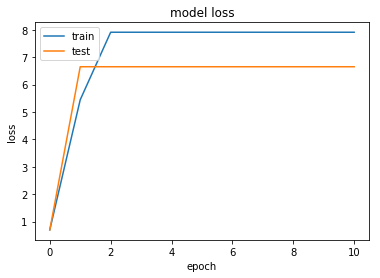

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()